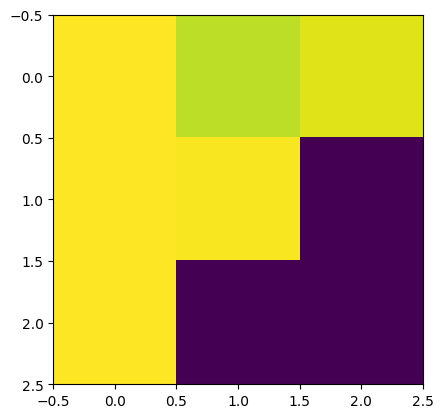

In [1]:
import numpy as np
from matrix import *
import matplotlib.pyplot as plt

A = np.array([[1.0,0.9,0.95],[1.0,0.99,0.],[1.,0.,0.]], dtype=np.double)

plt.imshow(A)

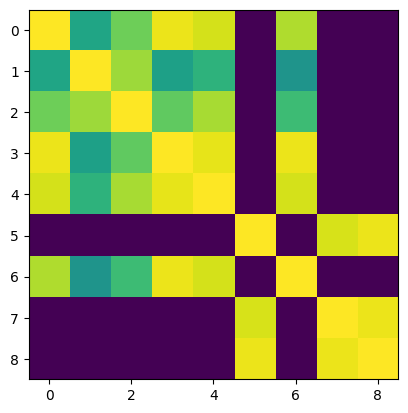

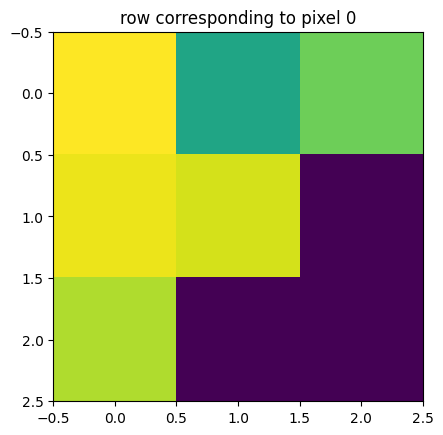

In [2]:
W = dissimilarity(A)
plt.imshow(W)
plt.show()
plt.title('row corresponding to pixel 0')
plt.imshow(W[0].reshape(3,3))
plt.show()

(9, 9)
[1.12397719e-16 1.38784212e-16 8.36330819e-01 9.71569564e-01
 9.79170057e-01 9.79843420e-01 9.92911288e-01 9.98203441e-01
 9.99775062e-01]


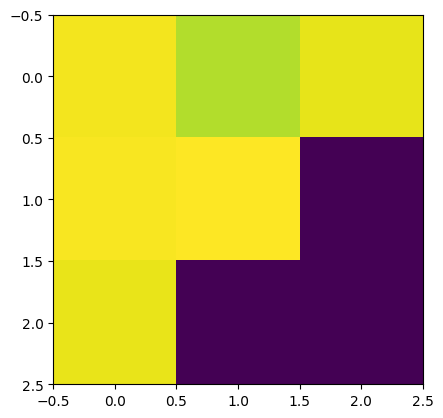

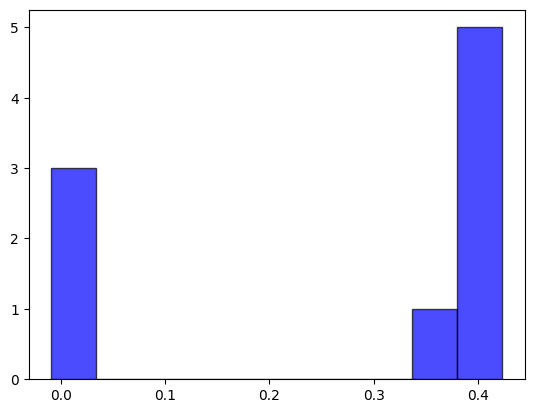

In [3]:
# Degree matrix
D = np.diag(np.sum(W, axis=1))

# Compute D^(-1/2)
D_inv_sqrt = np.linalg.inv(np.sqrt(D))

# Normalized Laplacian
L_norm = np.eye(W.shape[0]) - D_inv_sqrt @ W @ D_inv_sqrt


print(L_norm.shape)

eigval, eigvec = np.linalg.eigh(L_norm)

y = eigvec[:,1]

print(eigval)

plt.imshow(y.reshape(3,3))
plt.show()
plt.hist(y.flatten(), bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.show()

In [4]:
# normal eigenvector problem
# Av = λv and v.T v = 1
print(y.T @ y)

# generalized form
# Av = λBv and v.T B v = 1 

# our system is Lsym = D^-0.5 (D-W) D^-0.5
# for Lsym itself then y.t y = 1..
# but can transform back into generalized
# v = D^.5 y
# and then v.T D^-1 v = 1 should hold

v = np.sqrt(D) @ y # NxN @ Nx1
a = v.T @ np.linalg.inv(D) @ v  # 1xn @ nxn @ nx1
                                # 1xn @ nx1 = 1

print(a)                             



# Lsym​v=λv
# D^−0.5 ​L D^-0.5 ​v = λv (substitute Lsym)
# LD ^ -0.5 v = λ D^0.5 v (multiple both sides by D^0.5)

# if y = D^0.5 v
# then v = D^-0.5y
# then Ly = λD^0.5y
# or something like that?

1.0000000000000002
1.0000000000000002


In [5]:
# from gould
# def objective_fnc(self, x, u):
#         uTx = torch.einsum('bmn,bmk->bnk', u, x)
#         f = -torch.diagonal(torch.einsum('bnk,bkm->bnm', uTx, u), dim1=1, dim2=2)

#         return f.sum()

#     def constraint_fnc(self, u):
#         n = u.shape[2]
#         uTu = torch.einsum('bmn,bmk->bnk', u, u)
#         h = uTu - torch.eye(n, dtype=u.dtype, device=u.device).view(1, n, n)

#         return torch.diagonal(h, dim1=1, dim2=2)